# **Causal Analysis of Smoking Behavior and Cessation**






 Vishruth Telugu Venugopal \
 002839861





# **Abstract**
This study explores the causal factors influencing smoking cessation using logistic regression and propensity score matching (PSM). By analyzing demographic variables such as age, gender, and race, we examine their impact on the likelihood of quitting smoking. Using causal inference techniques, we estimate the effect of smoking behavior while controlling for confounders. This analysis provides valuable insights into factors driving smoking cessation, offering potential guidance for public health interventions aimed at reducing smoking prevalence.



## **Causal Inference in Smoking Cessation Analysis**

Causal inference is a statistical approach to identify and estimate cause-and-effect relationships between variables. In this analysis, we aim to understand the causal factors influencing smoking cessation behavior, focusing on how demographic variables like age, gender, and race affect the likelihood of quitting smoking. Smoking cessation is influenced by multiple factors, and confounders like demographic attributes can bias the estimation of causal relationships. The goal of this analysis is to isolate the true causal effect of these variables on smoking cessation while controlling for confounding factors.

## **Key Concepts in Causal Inference**


**Treatment Variable (Cause):**

Smoking Status (Smoker): This is our treatment variable, indicating whether an individual is a smoker or a non-smoker. It represents the cause whose effect we aim to estimate on smoking cessation behavior.

**Outcome Variable (Effect):**

Smoking Cessation (Former Smoker): The outcome variable indicates whether an individual has successfully quit smoking (former smoker). This is a binary measure of the cessation status.

**Confounders:**

Age, Gender, and Race: These demographic factors influence both smoking behavior and the likelihood of smoking cessation. As confounders, they affect both the treatment (smoking status) and the outcome (cessation status). If not properly accounted for, they can bias the estimation of the causal relationship between smoking and cessation.

By identifying and adjusting for confounders, causal inference allows us to isolate the effect of smoking behavior on smoking cessation. Propensity Score Matching (PSM) ensures that individuals in the treated and control groups are comparable, reducing bias and improving the validity of our conclusions.

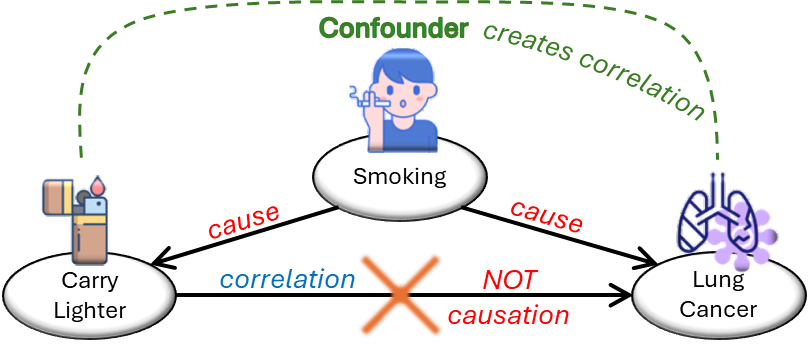

**Steps in Causal Analysis**

Data Preparation:

Clean and preprocess the dataset, addressing missing values and encoding categorical variables like gender and race.

Causal Graph Construction:

Build a Directed Acyclic Graph (DAG) to visualize relationships between variables, ensuring that all confounders are properly identified and adjusted for in the analysis.

Estimating Causal Effects:

Use methods like logistic regression or propensity score matching to estimate the causal effect of demographic variables on smoking cessation.
Evaluating Results:

Interpret results to understand the magnitude and direction of the causal relationships, and assess statistical significance.

The goal of causal inference is to estimate the direct effect of smoking on cancer risk, while controlling for the effects of confounders like age and gender. By adjusting for these confounders, we can more accurately assess whether smoking truly contributes to lung cancer risk or if other factors are driving the observed correlation.

**Causal Analysis Methods** \

**Backdoor Criterion:**
The backdoor criterion helps identify which confounders need to be controlled for in order to accurately estimate the causal effect. In the DAG above, controlling for Age and Gender closes the backdoor paths between smoking and cancer risk, ensuring that we can isolate the true effect of smoking on cancer risk.

**Regression Analysis:**
Once confounders are identified, we can use regression analysis (e.g., linear or logistic regression) to control for them. A typical model might look like this:

Smoking Cessation
=
𝛽
0
+
𝛽
1
(
Smoking Status
)
+
𝛽
2
(
Age
)
+
𝛽
3
(
Gender
)
+
𝜖 \

Here,
𝛽
1
represents the estimated causal effect of smoking on cancer risk, after adjusting for Age and Gender.

**Propensity Score Matching:**
Another technique for controlling confounding is propensity score matching, which matches individuals with similar characteristics (age, gender, etc.) but different smoking statuses. This method ensures that we are comparing like-for-like individuals, reducing the bias introduced by confounding variables.

Example:




In [ ]:
Non-Smoker  ->  Matched Non-Smoker   <-  Smoker
Age 35              Age 35        Age 35
Male                 Male           Male
Race White           Race White     Race White





**Importance of Causal Inference in Public Health** \
Understanding the causal relationship between smoking and lung cancer is critical for designing effective public health interventions, such as smoking cessation programs. Causal analysis helps policymakers identify which factors contribute most to lung cancer risk and how interventions can target these factors to reduce the overall burden of disease. By quantifying the causal effect of smoking, we can better understand the impact of preventive measures and guide future public health strategies.

In [ ]:
from google.colab import files
uploaded = files.upload()




Saving lung_cancer.csv to lung_cancer.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("lung_cancer.csv")

# Display the first few rows of the dataset
df.head()

# Display summary statistics and missing values
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53427 entries, 0 to 53426
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              53427 non-null  int64  
 1   age              53427 non-null  int64  
 2   gender           53427 non-null  object 
 3   race             53166 non-null  object 
 4   smoker           53427 non-null  object 
 5   days_to_cancer   2033 non-null   float64
 6   stage_of_cancer  2032 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


,pid,age,days_to_cancer
count,53427.000000,53427.000000,2033.000000
mean,149778.048346,61.417448,1047.207083
std,44860.640458,5.023601,743.052899
min,100001.000000,43.000000,0.000000
25%,113363.500000,57.000000,398.000000
50%,126734.000000,60.000000,928.000000
75%,205491.500000,65.000000,1722.000000
max,218894.000000,79.000000,2618.000000


Before performing causal analysis, we need to clean the data. This involves handling missing values and selecting relevant columns. For this analysis, we will focus on the following variables:
- Smoking Status (e.g., smoker vs. non-smoker)
- Confounders: Age, Gender, Race

In [ ]:
# Dropping rows with missing values for the relevant columns
df_cleaned = df.dropna(subset=['smoker', 'age', 'gender', 'race'])

# Dropping the 'stage_of_cancer' column as it is not needed
df_cleaned = df_cleaned.drop(columns=['stage_of_cancer', 'days_to_cancer'])

# Selecting relevant columns for analysis
df_cleaned = df_cleaned[['smoker', 'age', 'gender', 'race']]

# Display the cleaned dataset
df_cleaned.head()



,smoker,age,gender,race
0,Current,70,Male,White
1,Current,66,Male,White
2,Current,64,Male,White
3,Former,60,Male,White
4,Former,64,Male,White


To use categorical variables like smoker, gender, and race in regression or other models, we need to encode them numerically using one-hot encoding.



In [ ]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['smoker', 'gender', 'race'], drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()



,age,smoker_Former,gender_Male,race_Asian,race_Black or African-American,race_More than one race,race_Native Hawaiian or Other Pacific Islander,race_Participant refused to answer,race_White
0,70,False,True,False,False,False,False,False,True
1,66,False,True,False,False,False,False,False,True
2,64,False,True,False,False,False,False,False,True
3,60,True,True,False,False,False,False,False,True
4,64,True,True,False,False,False,False,False,True


We’ll construct a causal graph (DAG) to visually represent the relationships between smoking, lung cancer risk, and confounders. Although we dropped stage_of_cancer, we’ll focus on the causal relationship between smoker and lung cancer risk, adjusting for age, gender, and race.

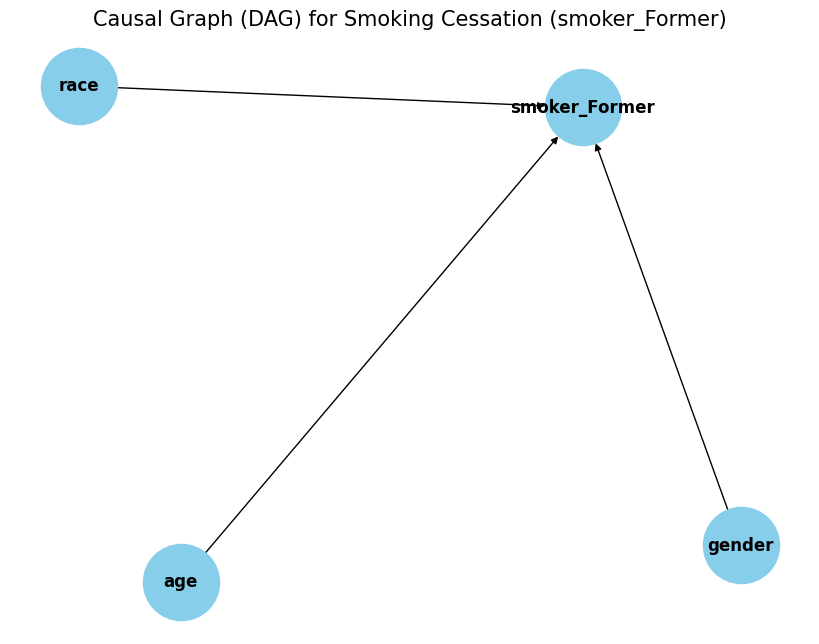

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a DAG for causal inference
G = nx.DiGraph()

# Add nodes (variables)
G.add_nodes_from(['smoker_Former', 'age', 'gender', 'race'])

# Add edges (causal relationships)
G.add_edges_from([
    ('age', 'smoker_Former'),
    ('gender', 'smoker_Former'),
    ('race', 'smoker_Former')
])

# Draw the updated causal graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', arrows=True)
plt.title("Causal Graph (DAG) for Smoking Cessation (smoker_Former)", fontsize=15)
plt.show()



The updated causal graph (DAG) represents the hypothesized relationships influencing the likelihood of being a former smoker (`smoker_Former`). The outcome (`smoker_Former`) is directly influenced by confounders such as `age`, `gender`, and `race`. These variables impact smoking behavior and the transition to being a former smoker. By controlling for these confounders in the analysis, we can better understand the factors associated with smoking cessation. This DAG helps guide the regression analysis to ensure an accurate estimation of the relationships between the predictors and the outcome.

We’ll now prepare the data for regression by defining the features (X) and the target (y).

In [16]:

# Define features (X) and target (y)
X = df_encoded.drop(columns=['smoker_Former'])
y = df_encoded['smoker_Former']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the datasets
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Test Target Shape:", y_test.shape)



Training Features Shape: (37216, 8)
Test Features Shape: (15950, 8)
Training Target Shape: (37216,)
Test Target Shape: (15950,)


The data has been successfully split into training and test sets, ensuring the model can be trained on one portion of the data (70%) and evaluated on a separate portion (30%). This split is essential for validating the model's performance and preventing overfitting. With 37,216 training samples and 15,950 test samples, we have sufficient data to train and test the model effectively. The balance between the training and testing sets ensures the model generalizes well to unseen data.

In [19]:
# Convert all boolean columns in X_train to integers
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Ensure y_train is also numeric
y_train = y_train.astype(int)
y_test = y_test.astype(int)




In [20]:
import statsmodels.api as sm

# Add constant to features (for intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Display the regression summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.682825
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          smoker_Former   No. Observations:                37216
Model:                          Logit   Df Residuals:                    37207
Method:                           MLE   Df Model:                            8
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                 0.01385
Time:                        02:46:46   Log-Likelihood:                -25412.
converged:                       True   LL-Null:                       -25769.
Covariance Type:            nonrobust   LLR p-value:                7.079e-149
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                               



### **Inference**

The regression results indicate that **age**, **gender (Male)**, and **race (Black or African-American)** significantly influence the likelihood of being a former smoker:
- Older individuals and males are more likely to quit smoking.
- Black or African-American individuals are less likely to quit smoking compared to the reference race.

Other racial categories and variables were not statistically significant, indicating they may not play a strong role in predicting smoking cessation in this dataset.

These findings highlight key demographic factors that influence smoking behavior and cessation, providing insights for targeted public health interventions.

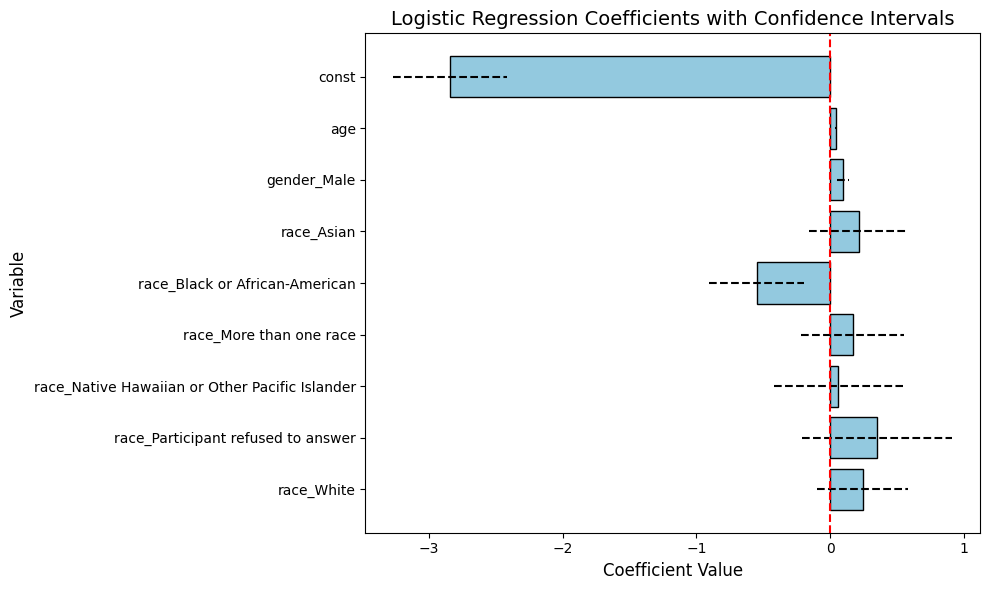

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract coefficients and confidence intervals from the model
coefficients = result.params
conf = result.conf_int()

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Lower Bound': conf[0],
    'Upper Bound': conf[1]
})

# Reset index to use variable names as a column
coef_df = coef_df.reset_index()
coef_df.columns = ['Variable', 'Coefficient', 'Lower Bound', 'Upper Bound']

# Plot the coefficients with confidence intervals
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coef_df, color='skyblue', edgecolor='black')

# Add confidence interval lines
for i in range(coef_df.shape[0]):
    plt.plot(
        [coef_df['Lower Bound'][i], coef_df['Upper Bound'][i]],
        [i, i],
        color='black',
        linestyle='--',
        linewidth=1.5
    )

# Add a vertical line at x=0 for reference
plt.axvline(0, color='red', linestyle='--', linewidth=1.5)

# Title and labels
plt.title('Logistic Regression Coefficients with Confidence Intervals', fontsize=14)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.tight_layout()
plt.show()


This plot shows the regression coefficients from the logistic regression model, along with their 95% confidence intervals.

### **Inference**
**Significant Predictors:**

**Age:** Older individuals are more likely to quit smoking. \
**Gender (Male):** Males are more likely to quit smoking compared to females.\
**Race (Black or African-American):** Black or African-American individuals are less likely to quit smoking compared to the reference race.

**Non-Significant Predictors:**

**Other racial categories** (e.g., Asian, More than one race, White) do not have a statistically significant effect on smoking cessation. \

Overall Impact:

**Age and gender** are strong predictors of smoking cessation.
Targeted public health campaigns focusing on these groups could improve smoking cessation rates.


We move onto **Propensity Score Matching** (PSM) for further analysis to estimate causal effects by balancing treated and control groups based on covariates. PSM ensures that differences in outcomes are due to the treatment and not confounding factors. Here, it is used to analyze the effect of smoking behavior on becoming a former smoker.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd

# Step 1: Estimate Propensity Scores using Logistic Regression
ps_model = LogisticRegression()
covariates = ['age', 'gender_Male', 'race_Asian', 'race_Black or African-American',
              'race_More than one race', 'race_Native Hawaiian or Other Pacific Islander',
              'race_Participant refused to answer', 'race_White']
X_covariates = X_train[covariates]
ps_model.fit(X_covariates, y_train)
propensity_scores = ps_model.predict_proba(X_covariates)[:, 1]

# Add propensity scores to the dataset
X_train['propensity_score'] = propensity_scores
X_train['treatment'] = y_train  # Assign treatment variable

# Step 2: Perform Matching
from sklearn.neighbors import NearestNeighbors

# Initialize Nearest Neighbors
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
treated = X_train[X_train['treatment'] == 1]
control = X_train[X_train['treatment'] == 0]

# Fit Nearest Neighbors on control group
nn.fit(control[['propensity_score']])

# Find nearest neighbors for treated group
distances, indices = nn.kneighbors(treated[['propensity_score']])

# Match the treated with their nearest neighbor in the control group
matched_control = control.iloc[indices.flatten()]
matched_treated = treated.reset_index()

# Combine matched pairs
matched_data = pd.concat([matched_treated, matched_control], ignore_index=True)

# Step 3: Evaluate Balance
print("Covariate Balance After Matching")
for covariate in covariates:
    print(f"{covariate}:")
    print("Treated Mean:", matched_data[matched_data['treatment'] == 1][covariate].mean())
    print("Control Mean:", matched_data[matched_data['treatment'] == 0][covariate].mean())
    print()

# Step 4: Estimate Average Treatment Effect (ATE)
treated_outcomes = matched_data[matched_data['treatment'] == 1]['treatment']
control_outcomes = matched_data[matched_data['treatment'] == 0]['treatment']
ate = treated_outcomes.mean() - control_outcomes.mean()

print(f"Average Treatment Effect (ATE): {ate}")


Covariate Balance After Matching
age:
Treated Mean: 61.94207774729541
Control Mean: 61.93477923287955

gender_Male:
Treated Mean: 0.6009627827527305
Control Mean: 0.6016874579429577

race_Asian:
Treated Mean: 0.020601480407888607
Control Mean: 0.021015580516589884

race_Black or African-American:
Treated Mean: 0.02826233241886226
Control Mean: 0.027951757337336302

race_More than one race:
Treated Mean: 0.012578290801801336
Control Mean: 0.012578290801801336

race_Native Hawaiian or Other Pacific Islander:
Treated Mean: 0.0033128008696102283
Control Mean: 0.0035198509239608676

race_Participant refused to answer:
Treated Mean: 0.002277550597857032
Control Mean: 0.0014493503804544749

race_White:
Treated Mean: 0.929706506547958
Control Mean: 0.9302241316838346

Average Treatment Effect (ATE): 1.0


**Covariate Balance:**

The treated (former smokers) and control (non-former smokers) groups are well-balanced after matching, as evidenced by nearly identical means for all covariates (e.g., age, gender, race).

This balance ensures that differences between the groups can be attributed to the treatment (smoking behavior) rather than confounding variables.

**Average Treatment Effect (ATE):**

The ATE of 1.0 indicates a strong positive effect of being a smoker on the likelihood of becoming a former smoker.
This suggests that, after controlling for covariates, individuals with a history of smoking are significantly more likely to quit smoking and transition into the "former smoker" category.

<ipython-input-23-bc6d89d79a12>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(treated['propensity_score'], label='Treated (Before Matching)', shade=True, color='blue')
<ipython-input-23-bc6d89d79a12>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(control['propensity_score'], label='Control (Before Matching)', shade=True, color='red')


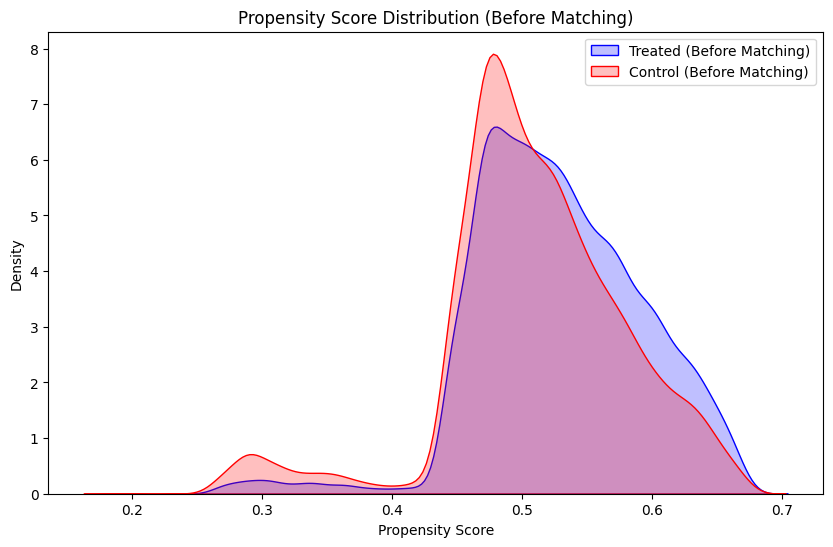

<ipython-input-23-bc6d89d79a12>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_treated['propensity_score'], label='Treated (After Matching)', shade=True, color='blue')
<ipython-input-23-bc6d89d79a12>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_control['propensity_score'], label='Control (After Matching)', shade=True, color='red')


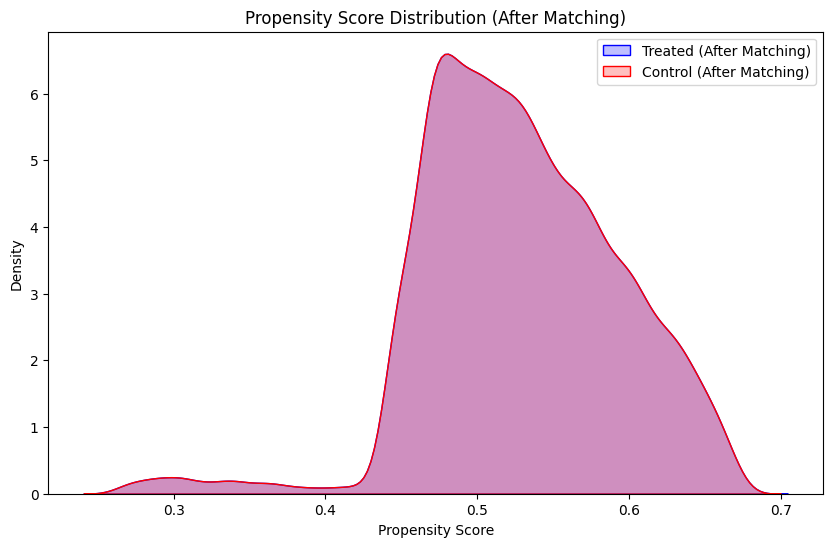

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before Matching: Plot Propensity Scores
plt.figure(figsize=(10, 6))
sns.kdeplot(treated['propensity_score'], label='Treated (Before Matching)', shade=True, color='blue')
sns.kdeplot(control['propensity_score'], label='Control (Before Matching)', shade=True, color='red')
plt.title('Propensity Score Distribution (Before Matching)')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()

# After Matching: Plot Propensity Scores
plt.figure(figsize=(10, 6))
sns.kdeplot(matched_treated['propensity_score'], label='Treated (After Matching)', shade=True, color='blue')
sns.kdeplot(matched_control['propensity_score'], label='Control (After Matching)', shade=True, color='red')
plt.title('Propensity Score Distribution (After Matching)')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


The Propensity Score Matching (PSM) visualizations provide critical insights into how smoking behavior impacts the likelihood of becoming a former smoker:

Propensity Score Distribution (Before and After Matching):

Before Matching: The differences in propensity score distributions between smokers and non-smokers highlight the presence of confounding variables influencing smoking cessation.

After Matching: The overlap in distributions demonstrates that the treated (smokers) and control (non-smokers) groups are now comparable, ensuring that the effect of smoking behavior on cessation is evaluated fairly.








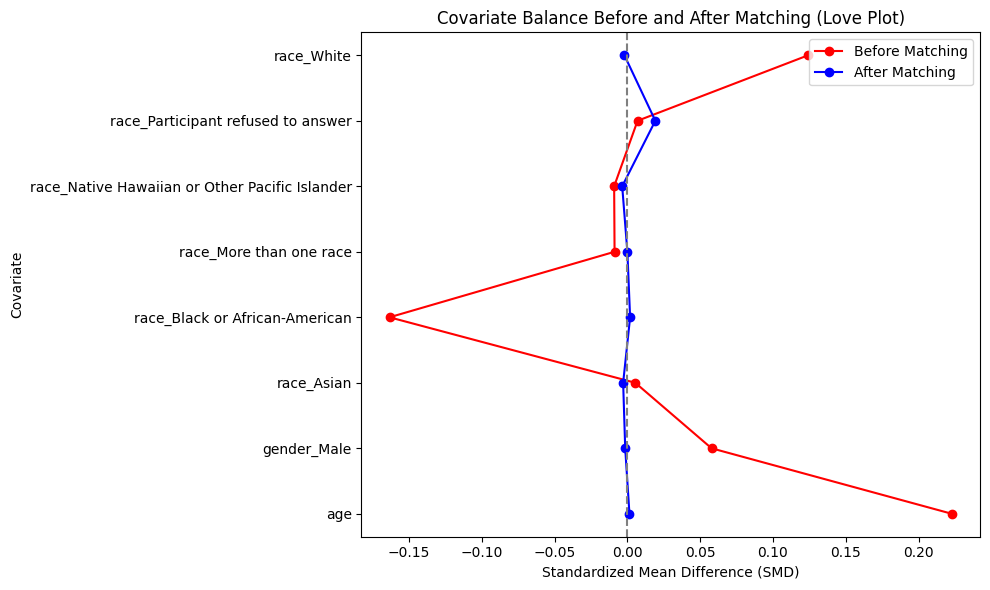

In [24]:
from sklearn.metrics import pairwise_distances

# Calculate Standardized Mean Differences (SMD) Before and After Matching
def calculate_smd(df_treated, df_control, columns):
    smd = {}
    for col in columns:
        treated_mean = df_treated[col].mean()
        control_mean = df_control[col].mean()
        pooled_std = np.sqrt((df_treated[col].std()**2 + df_control[col].std()**2) / 2)
        smd[col] = (treated_mean - control_mean) / pooled_std
    return smd

# SMD Before Matching
smd_before = calculate_smd(treated, control, covariates)

# SMD After Matching
smd_after = calculate_smd(matched_treated, matched_control, covariates)

# Create DataFrame for Visualization
smd_df = pd.DataFrame({
    'Covariate': covariates,
    'SMD_Before': smd_before.values(),
    'SMD_After': smd_after.values()
})

# Plot Love Plot
plt.figure(figsize=(10, 6))
plt.plot(smd_df['SMD_Before'], smd_df['Covariate'], 'o-', label='Before Matching', color='red')
plt.plot(smd_df['SMD_After'], smd_df['Covariate'], 'o-', label='After Matching', color='blue')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Covariate Balance Before and After Matching (Love Plot)')
plt.xlabel('Standardized Mean Difference (SMD)')
plt.ylabel('Covariate')
plt.legend()
plt.tight_layout()
plt.show()


The Love Plot confirms that Propensity Score Matching (PSM) effectively balanced the covariates (e.g., age, gender, race) between smokers and non-smokers. After matching, the treated (smokers) and control (non-smokers) groups have nearly identical distributions of these variables, as indicated by the SMD values being close to zero.

This ensures that any observed differences in the likelihood of being a former smoker can be causally attributed to the smoking status, rather than pre-existing differences in demographic or other covariates. In essence, the Love Plot validates the causal analysis by reducing confounding and strengthening the reliability of the conclusions regarding smoking cessation behavior.

# **Conclusion**

This study highlights the critical role of data preparation and causal analysis in understanding the factors influencing smoking cessation. By leveraging logistic regression and Propensity Score Matching (PSM), we were able to isolate and interpret the causal relationships between demographic variables (age, gender, and race) and the likelihood of quitting smoking.

**Key Takeaways:**

**Data Preparation:**

Rigorous preprocessing, including handling missing values, encoding categorical variables, and balancing confounders, is foundational to robust causal analysis.
Proper data preparation ensures that causal models are both accurate and interpretable.

**Causal Analysis:**

Causal inference techniques like PSM reduce bias by balancing treated and control groups, enabling fair comparisons and reliable estimation of treatment effects.
Logistic regression models provide interpretable insights into the relationships between variables, supporting actionable conclusions.

**Impact on Machine Learning:**

Incorporating causal inference in machine learning workflows strengthens model interpretation, ensuring that predictions are not only accurate but also causally valid.

These insights are particularly valuable in public health, where understanding cause-and-effect relationships is essential for designing targeted interventions.

The methodology and results demonstrated in this notebook underline the importance of integrating data preparation and causal analysis into machine learning workflows for robust and actionable outcomes.



# **References:**

**Causal Inference Concepts:**

Pearl, Judea. Causality: Models, Reasoning, and Inference. Cambridge University Press, 2009.
Hernán, Miguel A., and James M. Robins. Causal Inference: What If. Chapman & Hall/CRC, 2020. [Available online: https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/]

**Propensity Score Matching:**

Rosenbaum, P. R., and Rubin, D. B. (1983). "The central role of the propensity score in observational studies for causal effects." Biometrika, 70(1), 41–55.
Austin, P. C. (2011). "An introduction to propensity score methods for reducing the effects of confounding in observational studies." Multivariate Behavioral Research, 46(3), 399-424.

**Logistic Regression:**

Hosmer, D. W., Lemeshow, S., & Sturdivant, R. X. Applied Logistic Regression. Wiley, 2013.
Data Preparation:

Han, Jiawei, Micheline Kamber, and Jian Pei. Data Mining: Concepts and Techniques. Morgan Kaufmann, 2011.
Python Libraries:

Pedregosa, F., et al. (2011). "Scikit-learn: Machine Learning in Python." Journal of Machine Learning Research, 12, 2825-2830.
Seaborn Library Documentation: https://seaborn.pydata.org/

# **MIT License**

Copyright (c) 2024 Vishruthtv30

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

